Library Python berhasil diimpor.
Konfigurasi dataset baru berhasil dimuat.
Fungsi helper eksplorasi dimuat.
Fungsi `explore_dataset` siap digunakan.

 Memulai Eksplorasi Dataset 1: Bike Sharing 
Justifikasi Kunci:
- Frekuensi tinggi (jam)
- Domain transportasi
- Musiman ganda (harian, mingguan)
- Pengaruh faktor eksternal (cuaca)
------------------------------

-- Memuat Dataset 1: Bike Sharing --
Mengunduh data dari: https://raw.githubusercontent.com/kanadakurniawan/loss-function-comparison/d663e9a1058407da4e11c24fc6693a108bc70ffd/dataset/bike-sharing.csv
Data berhasil diunduh.
Memulai parsing CSV (time: 'dteday', value: 'cnt')...
Parsing CSV selesai. 1 series ('Bike_Sharing_Series') ditemukan dgn 731 titik data.

Memilih series: 'Bike_Sharing_Series' (Index: 0) dari 'Bike Sharing'
Tidak ada nilai NaN.
DataFrame siap (731 baris). Contoh:
                   ds       y            unique_id
0 2011-01-01 00:00:00   985.0  Bike_Sharing_Series
1 2011-01-01 01:00:00   801.0  Bike_Sharing_Ser

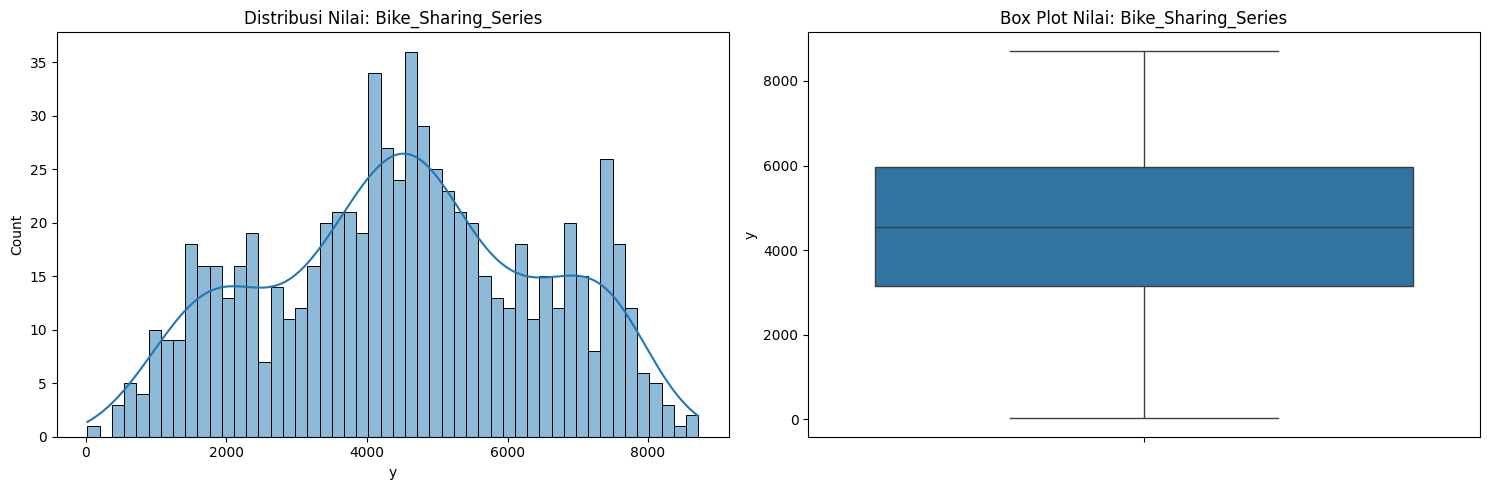


--- Analisis Visual Time Series: Bike_Sharing_Series ---


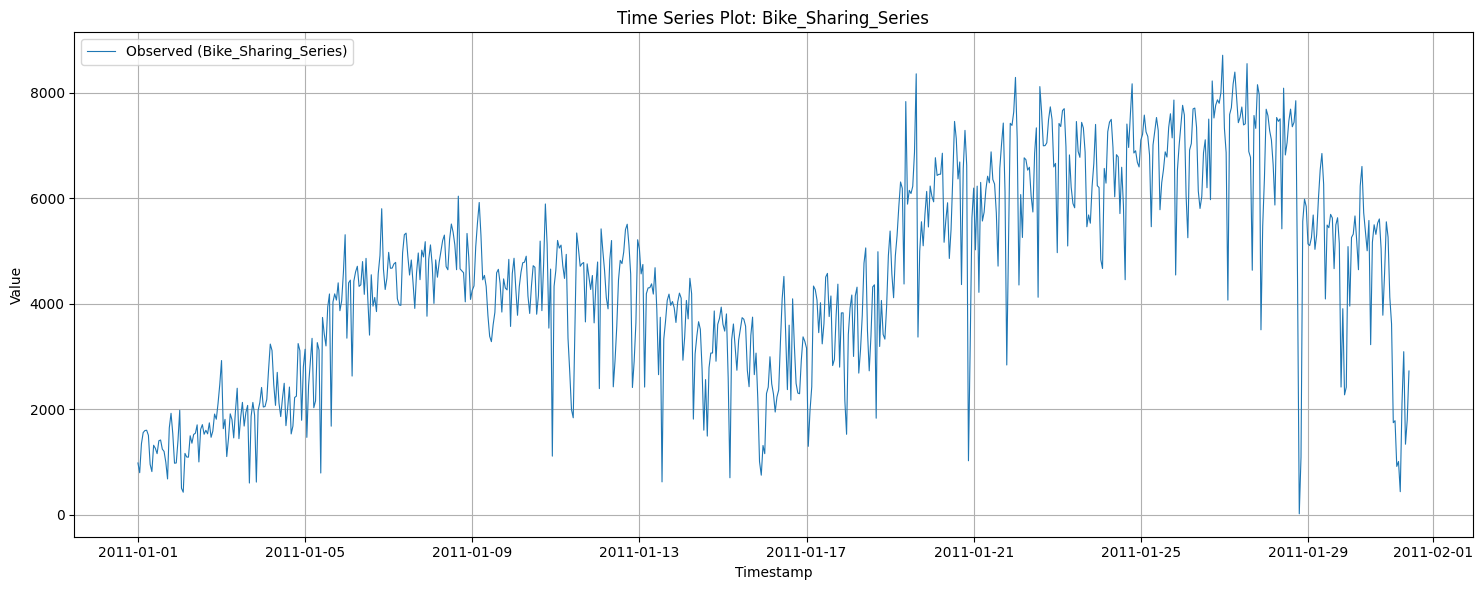

Melakukan dekomposisi (Model Aditif, Periode=24)...


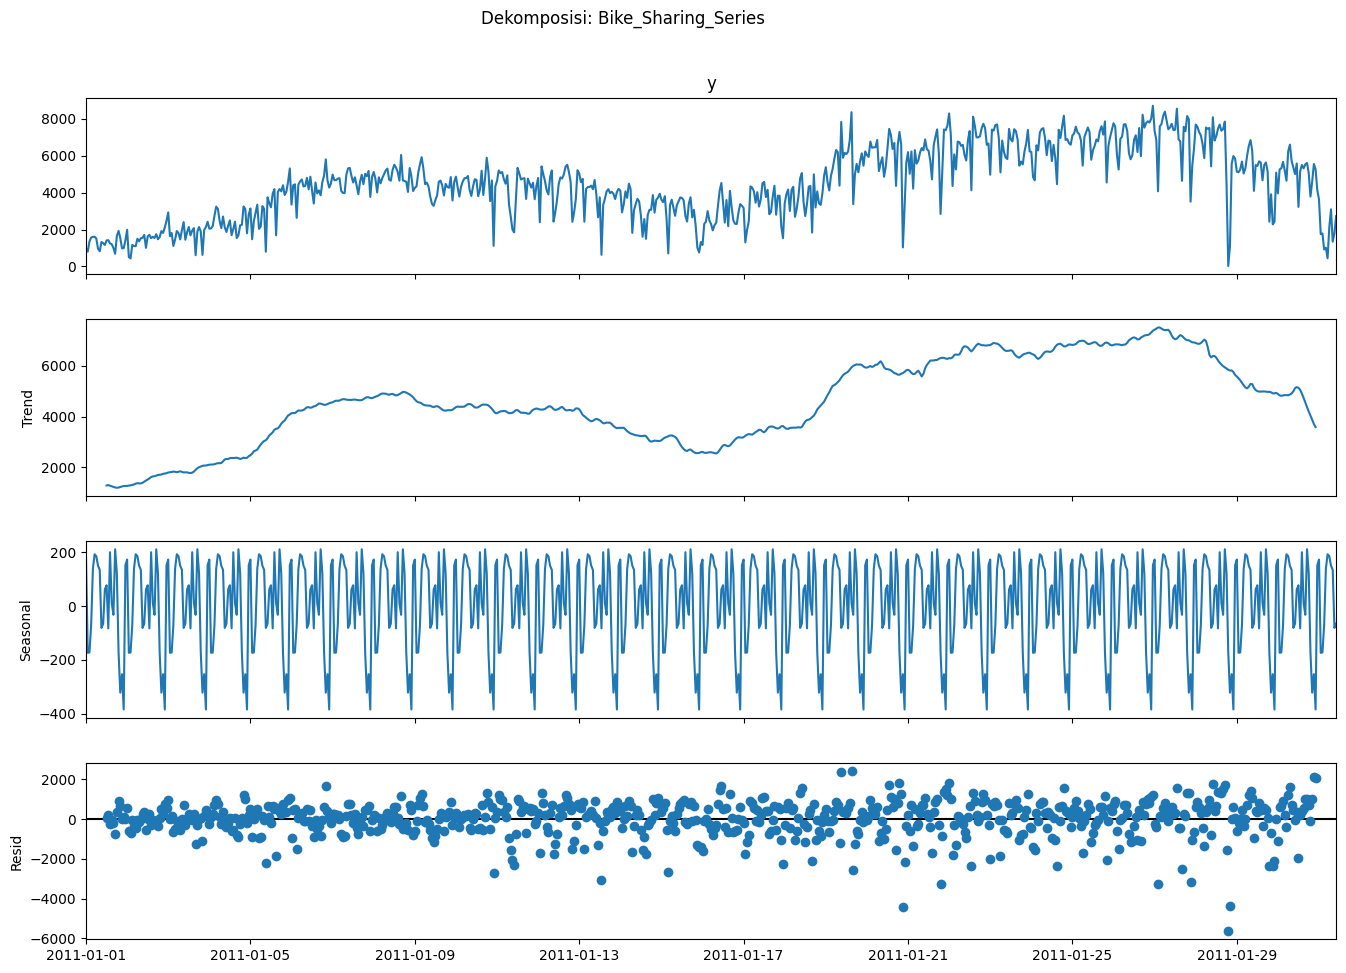

Melakukan plotting ACF dan PACF (lags=48)...


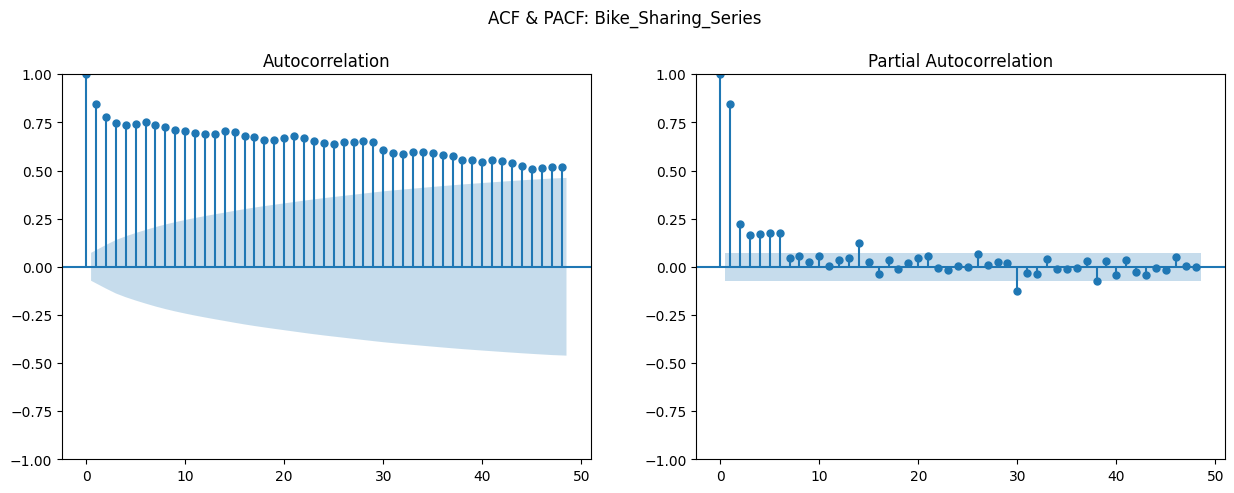


 Eksplorasi Selesai: Bike Sharing (Series: Bike_Sharing_Series)



 Memulai Eksplorasi Dataset 2: Pasut BMKG 
Justifikasi Kunci:
- Frekuensi tinggi (jam)
- Domain lingkungan/oseanografi
- Pola musiman sangat kuat dan reguler (pasang surut)
- Data dunia nyata dari BMKG
------------------------------

-- Memuat Dataset 2: Pasut BMKG --
Mengunduh data dari: https://raw.githubusercontent.com/kanadakurniawan/loss-function-comparison/d663e9a1058407da4e11c24fc6693a108bc70ffd/dataset/db-2022-2024-pasut.csv
Data berhasil diunduh.
Memulai parsing CSV (time: 'waktu', value: 'level')...
Error parsing CSV: Kolom waktu 'waktu' TIDAK DITEMUKAN. Kolom tersedia: ['tanggal', 'pasut']
Traceback (most recent call last):
  File "/tmp/ipython-input-924289284.py", line 140, in parse_csv_data
    if time_col not in df.columns: raise ValueError(f"Kolom waktu '{time_col}' TIDAK DITEMUKAN. Kolom tersedia: {df.columns.tolist()}")
                                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

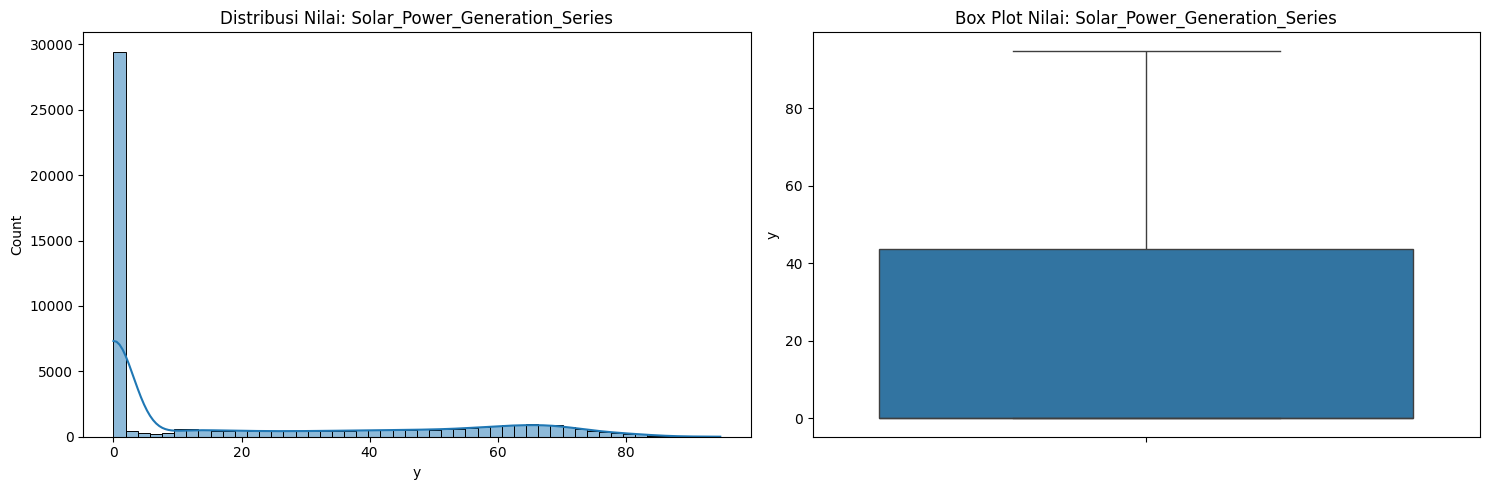


--- Analisis Visual Time Series: Solar_Power_Generation_Series ---


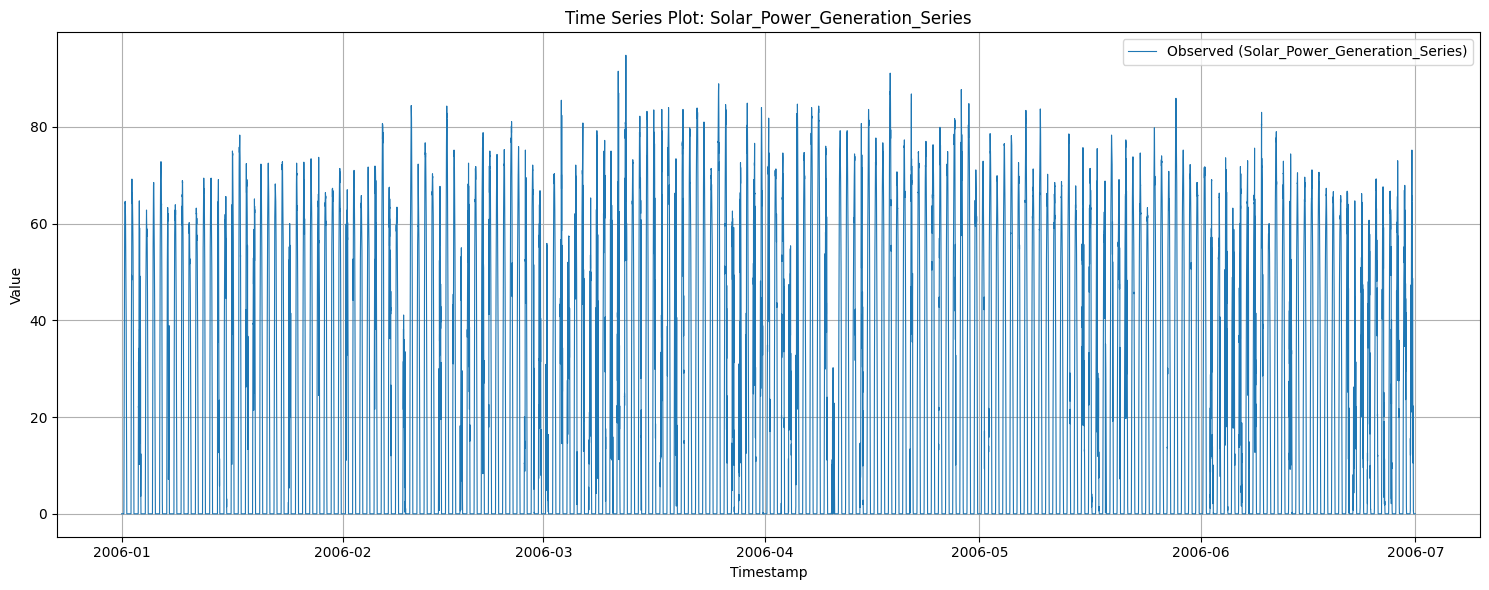

INFO: Data terlalu panjang. Analisis detail (dekomposisi, ACF/PACF) dilakukan pada 26280 poin terakhir.
Melakukan dekomposisi (Model Aditif, Periode=288)...


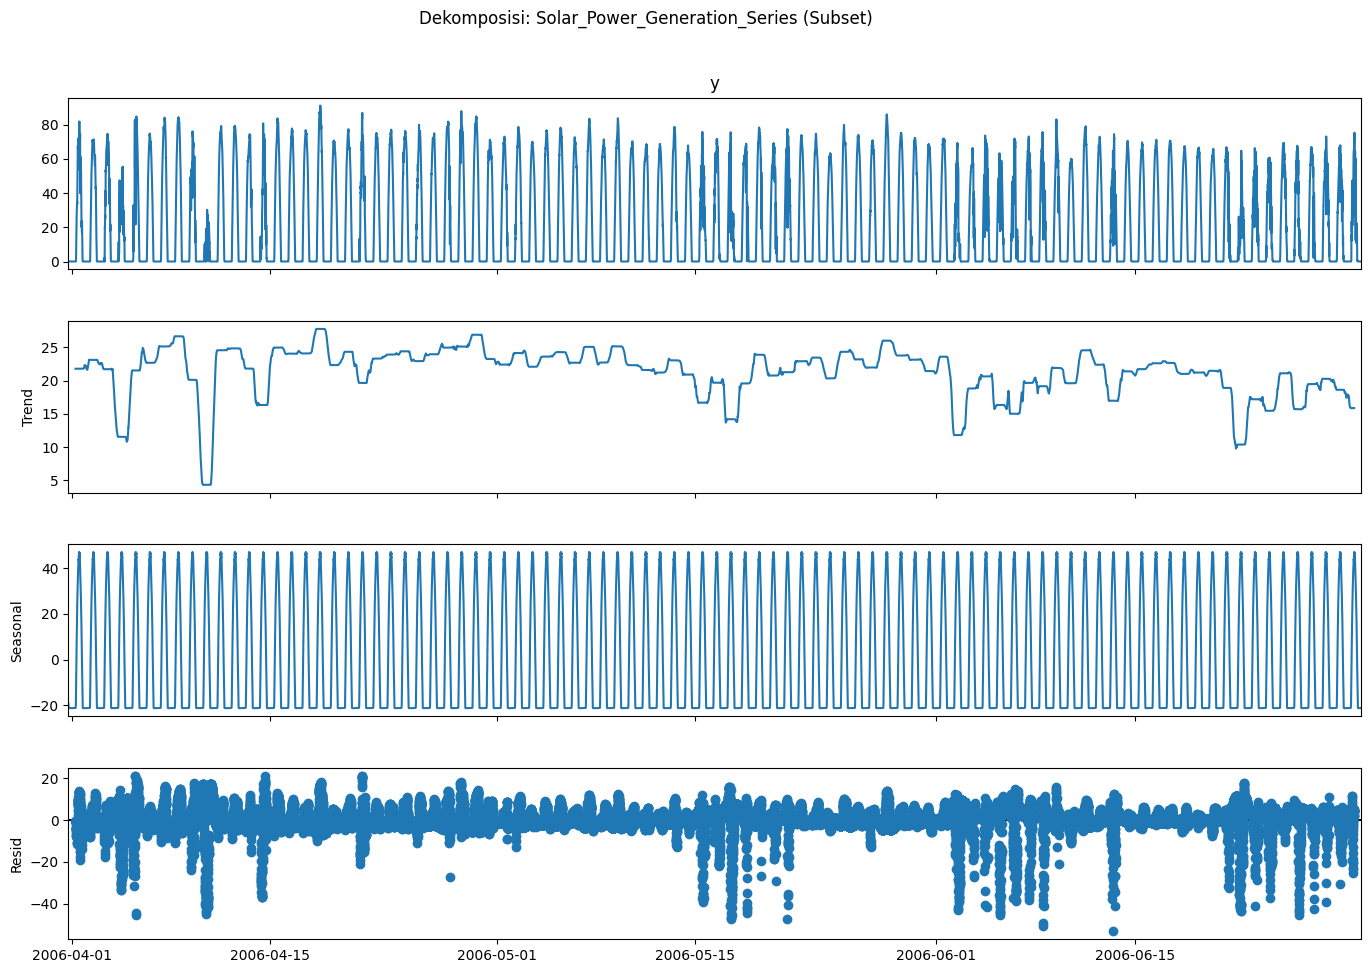

Melakukan plotting ACF dan PACF (lags=48)...


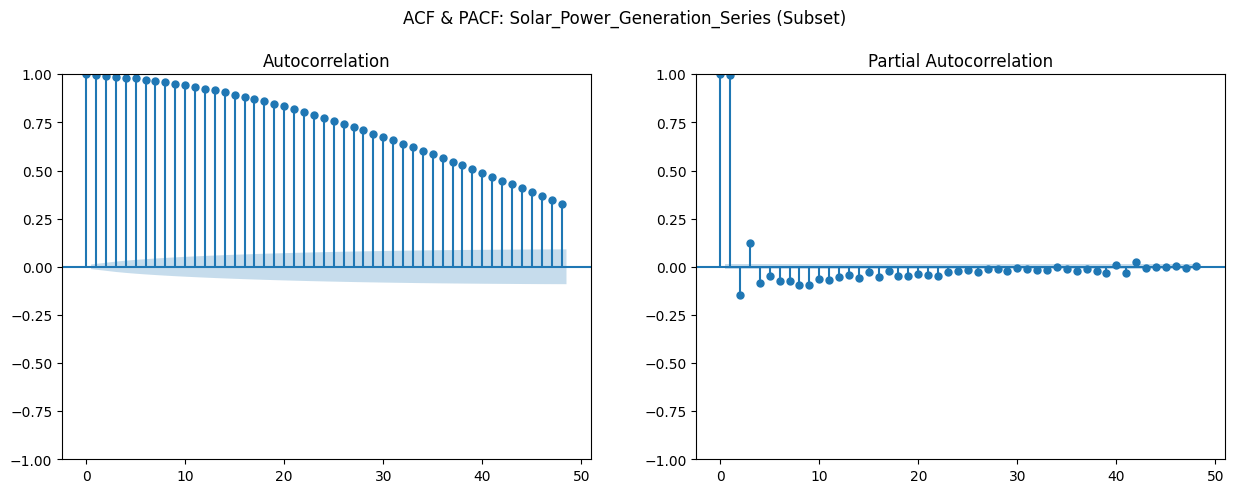


 Eksplorasi Selesai: Solar Power Generation (Series: Solar_Power_Generation_Series)



 Memulai Eksplorasi Dataset 5: Cacar Air Hungaria 
Justifikasi Kunci:
- Frekuensi rendah (mingguan)
- Domain epidemiologi/kesehatan
- Musiman tahunan yang jelas
- Contoh data count (jumlah kasus)
Catatan: File ini berisi banyak series (per wilayah). Kode ini akan menganalisis kolom 'BUDAPEST' sebagai contoh.
------------------------------

-- Memuat Dataset 5: Cacar Air Hungaria --
Mengunduh data dari: https://raw.githubusercontent.com/kanadakurniawan/loss-function-comparison/d663e9a1058407da4e11c24fc6693a108bc70ffd/dataset/cacar-air-hungaria.csv
Data berhasil diunduh.
Memulai parsing CSV (time: 'Date', value: 'BUDAPEST')...
Parsing CSV selesai. 1 series ('Cacar_Air_Hungaria_Series') ditemukan dgn 522 titik data.

Memilih series: 'Cacar_Air_Hungaria_Series' (Index: 0) dari 'Cacar Air Hungaria'
Tidak ada nilai NaN.
DataFrame siap (522 baris). Contoh:
          ds      y                  unique_id
0 2

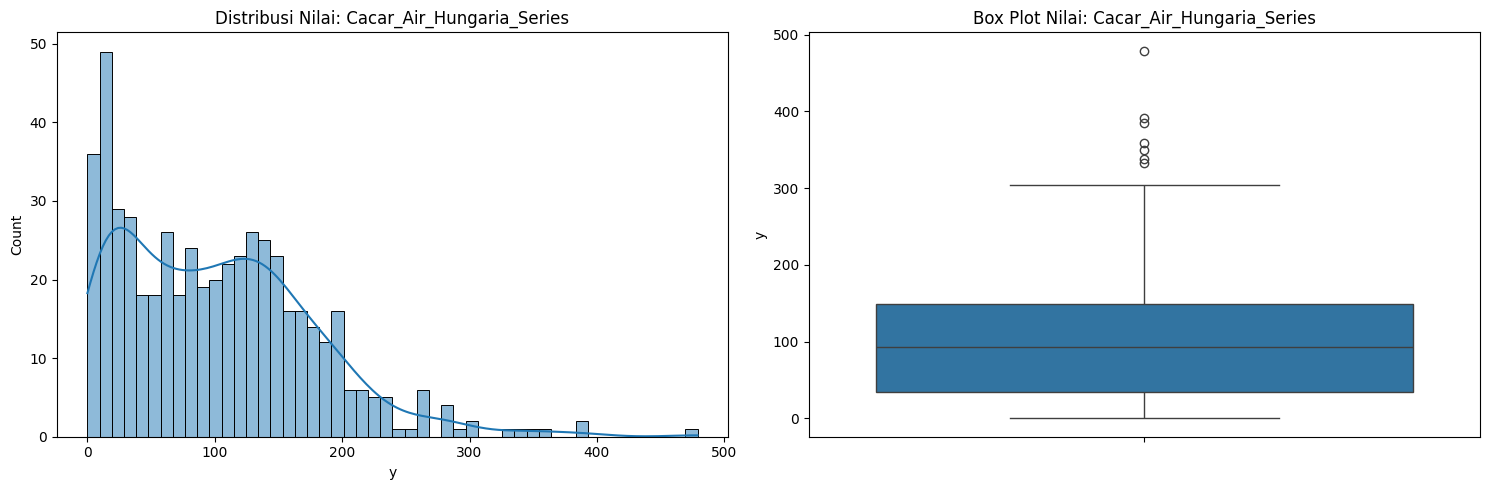


--- Analisis Visual Time Series: Cacar_Air_Hungaria_Series ---


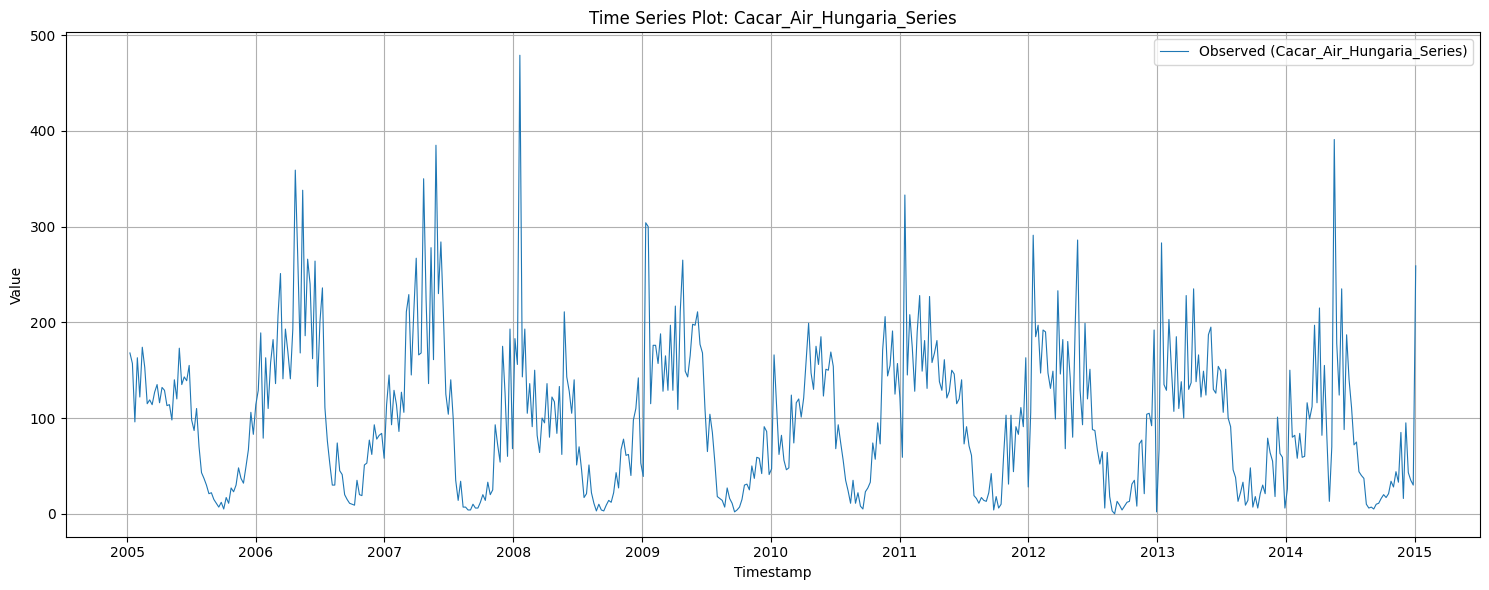

Melakukan dekomposisi (Model Aditif, Periode=52)...


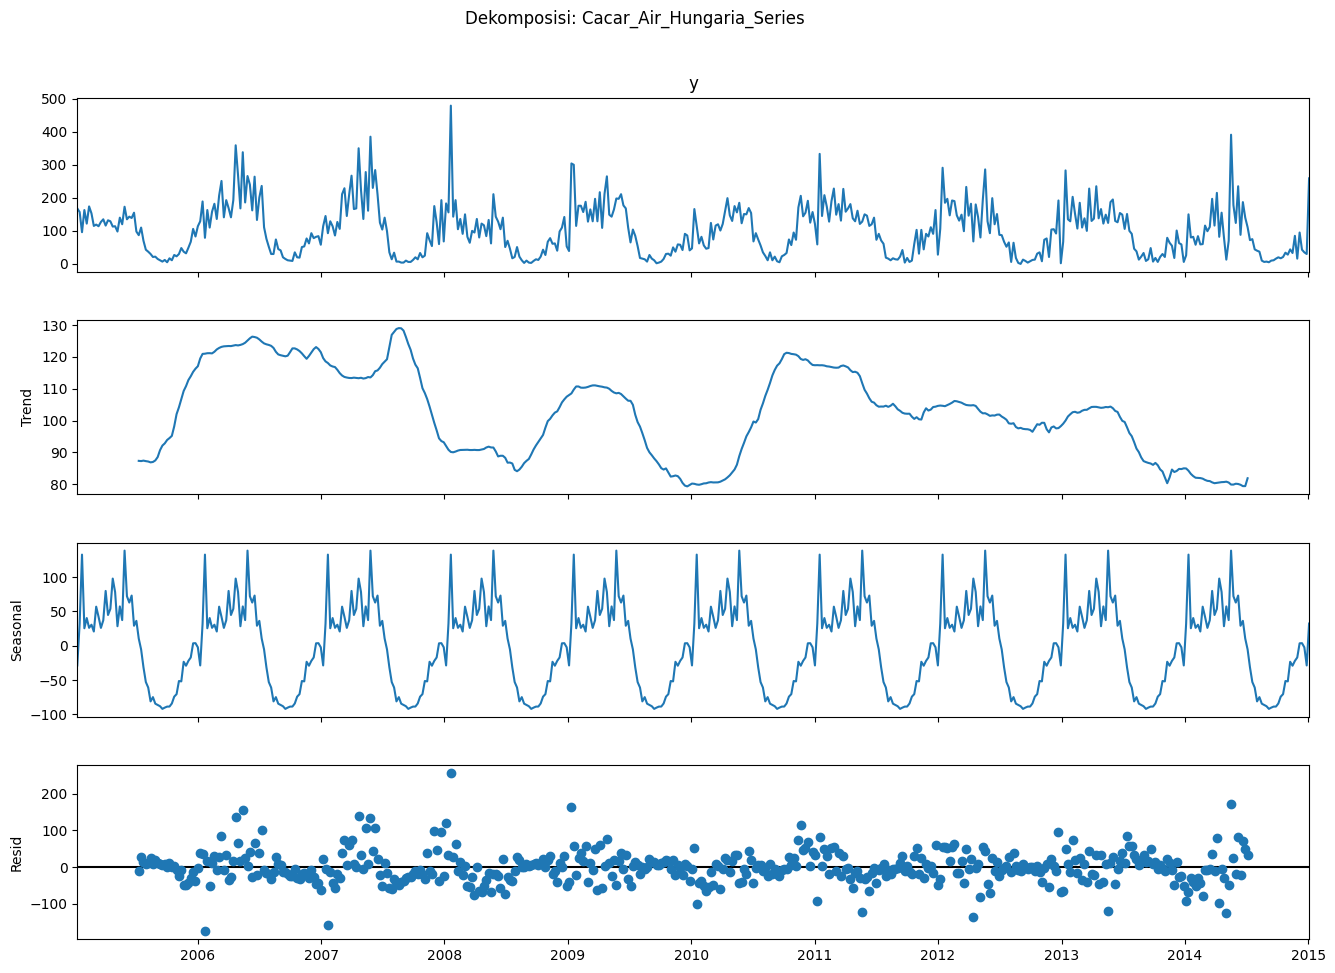

Melakukan plotting ACF dan PACF (lags=48)...


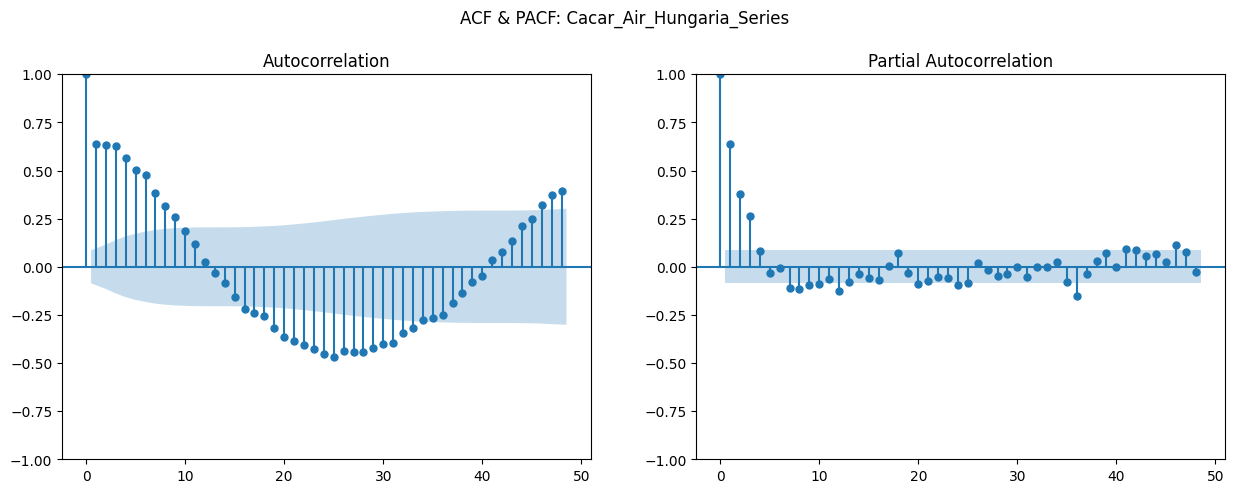


 Eksplorasi Selesai: Cacar Air Hungaria (Series: Cacar_Air_Hungaria_Series)



 Memulai Eksplorasi Dataset 6: M4 Hourly Dataset 
Justifikasi Kunci:
- Frekuensi tinggi (jam)
- Benchmark klasik dari kompetisi M4
- Berisi beragam jenis data (industri, finansial, dll.)
- Tantangan dalam noise dan variabilitas pola
------------------------------

-- Memuat Dataset 6: M4 Hourly Dataset --
Mengunduh data dari: https://raw.githubusercontent.com/kanadakurniawan/loss-function-comparison/8f605f9fbc107e6303174d3f615a5d591785d55e/dataset/m4_hourly_dataset.tsf
Data berhasil diunduh.
  Gagal decode dengan encoding default. Mencoba iso-8859-1...
Memulai parsing TSF (varian: standard)...
Parsing TSF selesai. 0 series berhasil diparsing.
Error saat memilih series: Tdk ada data series tersedia u/ dipilih.
=== SEMUA EKSEKUSI YANG DIKONFIGURASI TELAH SELESAI ===


In [3]:
# ==============================================================================
# KODE GABUNGAN UNTUK EKSPLORASI DATASET TESIS (VERSI FINAL REVISI)
# ==============================================================================
# Perubahan:
# - Konfigurasi dataset (DATASET_CONFIG) sepenuhnya diganti sesuai permintaan.
# - Ketergantungan pada Google Drive Mount telah dihilangkan.
# - Proses eksekusi di bagian akhir diotomatisasi menggunakan loop.
# - Komentar dan detail (nama kolom, frekuensi) disesuaikan untuk dataset baru.
#
# Harap verifikasi nama kolom di DATASET_CONFIG jika terjadi error.
# ==============================================================================

# --- Instalasi Library (jika belum ada) ---
# !pip install neuralforecast statsmodels requests pandas numpy matplotlib seaborn -q
# print("Instalasi library eksternal selesai.")

# --- Import Libraries Utama ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy.stats import describe
import requests
from io import StringIO
import os
import traceback
import random
import warnings

warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)

print("Library Python berhasil diimpor.")

# --- Konfigurasi & Seed ---
seed = 42
np.random.seed(seed)
random.seed(seed)

# --- KONFIGURASI DATASET BARU ---
DATASET_CONFIG = {
    1: {
        'name': 'Bike Sharing', 'type': 'csv',
        'source': "https://raw.githubusercontent.com/kanadakurniawan/loss-function-comparison/d663e9a1058407da4e11c24fc6693a108bc70ffd/dataset/bike-sharing.csv",
        'freq': 'H', 'parser_variant': None, 'value_column': 'cnt', 'time_column': 'dteday',
        'justification_points': ["Frekuensi tinggi (jam)", "Domain transportasi", "Musiman ganda (harian, mingguan)", "Pengaruh faktor eksternal (cuaca)"],
    },
    2: {
        'name': 'Pasut BMKG', 'type': 'csv',
        'source': 'https://raw.githubusercontent.com/kanadakurniawan/loss-function-comparison/d663e9a1058407da4e11c24fc6693a108bc70ffd/dataset/db-2022-2024-pasut.csv',
        'freq': 'H', 'parser_variant': None, 'value_column': 'level', 'time_column': 'waktu',
        'justification_points': ["Frekuensi tinggi (jam)", "Domain lingkungan/oseanografi", "Pola musiman sangat kuat dan reguler (pasang surut)", "Data dunia nyata dari BMKG"],
    },
    3: {
        'name': 'Parking Birmingham', 'type': 'csv',
        'source': 'https://raw.githubusercontent.com/kanadakurniawan/loss-function-comparison/d663e9a1058407da4e11c24fc6693a108bc70ffd/dataset/parking-birmingham.csv',
        'freq': '30min', 'parser_variant': None, 'value_column': 'Occupancy', 'time_column': 'LastUpdate',
        'justification_points': ["Frekuensi tinggi (30 menit)", "Domain urban/transportasi", "Potensi pola harian dan mingguan yang kompleks", "Mengandung nilai nol atau mendekati nol (malam hari)"],
    },
    4: {
        'name': 'Solar Power Generation', 'type': 'csv',
        'source': 'https://raw.githubusercontent.com/kanadakurniawan/loss-function-comparison/d663e9a1058407da4e11c24fc6693a108bc70ffd/dataset/Actual_31.85_-110.85_2006_UPV_100MW_5_Min.csv',
        'freq': '5min', 'parser_variant': None, 'value_column': 'Power(MW)', 'time_column': 'LocalTime',
        'justification_points': ["Frekuensi sangat tinggi (5 menit)", "Domain energi terbarukan", "Intermittency tinggi (nilai nol di malam hari)", "Sangat dipengaruhi cuaca (volatilitas)"],
    },
    5: {
        'name': 'Cacar Air Hungaria', 'type': 'csv',
        'source': 'https://raw.githubusercontent.com/kanadakurniawan/loss-function-comparison/d663e9a1058407da4e11c24fc6693a108bc70ffd/dataset/cacar-air-hungaria.csv',
        'freq': 'W', 'parser_variant': None, 'value_column': 'BUDAPEST', 'time_column': 'Date',
        'justification_points': ["Frekuensi rendah (mingguan)", "Domain epidemiologi/kesehatan", "Musiman tahunan yang jelas", "Contoh data count (jumlah kasus)"],
        'notes': "File ini berisi banyak series (per wilayah). Kode ini akan menganalisis kolom 'BUDAPEST' sebagai contoh."
    },
    6: {
        'name': 'M4 Hourly Dataset', 'type': 'tsf',
        'source': 'https://raw.githubusercontent.com/kanadakurniawan/loss-function-comparison/8f605f9fbc107e6303174d3f615a5d591785d55e/dataset/m4_hourly_dataset.tsf',
        'freq': 'H', 'parser_variant': 'standard', 'value_column': None, 'time_column': None,
        'justification_points': ["Frekuensi tinggi (jam)", "Benchmark klasik dari kompetisi M4", "Berisi beragam jenis data (industri, finansial, dll.)", "Tantangan dalam noise dan variabilitas pola"],
    }
}
NAN_IMPUTATION_METHOD = 'ffill_bfill'
os.environ['NIXTLA_ID_AS_COL'] = '1'

print("Konfigurasi dataset baru berhasil dimuat.")

# --- Fungsi Helper (Loading, Parsing, Cleaning, Preparing) ---
# (Fungsi-fungsi di bagian ini tetap sama karena sudah dirancang secara generik dan robust)

def load_data_from_source(source_path_or_url):
    """Membaca konten data dari URL atau file lokal dengan fallback encoding."""
    source_str = str(source_path_or_url)
    if source_str.startswith('http'):
        print(f"Mengunduh data dari: {source_str}")
        try:
            response = requests.get(source_str, timeout=60)
            response.raise_for_status()
            print("Data berhasil diunduh.")
            try:
                encoding = response.encoding if response.encoding else 'utf-8'
                return response.content.decode(encoding)
            except UnicodeDecodeError:
                print(f"  Gagal decode dengan encoding default. Mencoba iso-8859-1...")
                return response.content.decode('iso-8859-1')
        except requests.exceptions.RequestException as e: print(f"Error mengunduh data: {e}"); return None
    else: # Logika untuk file lokal (dipertahankan jika diperlukan di masa depan)
        print(f"Membaca data dari file lokal: {source_str}")
        if not os.path.exists(source_str): print(f"Error: File tdk ditemukan di {source_str}"); return None
        try:
            with open(source_str, 'r', encoding='utf-8') as f: return f.read()
        except UnicodeDecodeError:
            with open(source_str, 'r', encoding='iso-8859-1') as f: return f.read()
        except Exception as e: print(f"Error membaca file lokal: {e}"); return None

def parse_tsf_data(raw_content, parser_variant):
    """Mem-parsing data TSF mentah (dari string)."""
    parsed_series, series_ids, start_times = [], [], []
    print(f"Memulai parsing TSF (varian: {parser_variant})...")
    lines = raw_content.splitlines(); reading_data = False
    for line in lines:
        line = line.strip()
        if not line or line.startswith(("@", "#")): continue
        if line.startswith("@data"): reading_data = True; continue
        if reading_data:
            parts = line.split(":")
            try:
                series_name, start_time_str, values_str = parts[0], parts[1], parts[2]
                start_time = pd.to_datetime(start_time_str)
                time_series = [float(v) for v in values_str.split(",") if v.strip() and v.strip() != '?']
                parsed_series.append(time_series); series_ids.append(series_name); start_times.append(start_time)
            except (ValueError, IndexError): continue # Skip baris yang formatnya salah
    print(f"Parsing TSF selesai. {len(parsed_series)} series berhasil diparsing.")
    return series_ids, start_times, parsed_series

def parse_csv_data(raw_content, time_col, value_col, dataset_name):
    """Mem-parsing data CSV mentah (dari string) menjadi satu time series."""
    print(f"Memulai parsing CSV (time: '{time_col}', value: '{value_col}')...")
    try:
        df = pd.read_csv(StringIO(raw_content))
        if time_col not in df.columns: raise ValueError(f"Kolom waktu '{time_col}' TIDAK DITEMUKAN. Kolom tersedia: {df.columns.tolist()}")
        if value_col not in df.columns: raise ValueError(f"Kolom nilai '{value_col}' TIDAK DITEMUKAN. Kolom tersedia: {df.columns.tolist()}")

        df[time_col] = pd.to_datetime(df[time_col])
        df[value_col] = pd.to_numeric(df[value_col], errors='coerce')
        df = df.sort_values(by=time_col).reset_index(drop=True)

        start_time = df[time_col].iloc[0]
        time_series = df[value_col].tolist()
        unique_id = f"{dataset_name.replace(' ', '_')}_Series"
        print(f"Parsing CSV selesai. 1 series ('{unique_id}') ditemukan dgn {len(time_series)} titik data.")
        return [unique_id], [start_time], [time_series]
    except Exception as e:
        print(f"Error parsing CSV: {e}\n{traceback.format_exc()}"); return [], [], []

def load_and_parse_data(dataset_index, config):
    """Fungsi utama memuat dan mem-parsing dataset."""
    cfg = config.get(dataset_index)
    if not cfg: raise ValueError(f"Config u/ Indeks Dataset '{dataset_index}' tdk ditemukan.")
    dataset_name = cfg['name']
    print(f"\n-- Memuat Dataset {dataset_index}: {dataset_name} --")
    raw_content = load_data_from_source(cfg['source'])
    if raw_content is None: return None, None, None, None, None
    if cfg['type'] == 'tsf':
        return (*parse_tsf_data(raw_content, cfg['parser_variant']), cfg['freq'], dataset_name)
    elif cfg['type'] == 'csv':
        return (*parse_csv_data(raw_content, cfg['time_column'], cfg['value_column'], dataset_name), cfg['freq'], dataset_name)
    return None, None, None, None, None

def select_series(all_ids, all_start_times, all_series_data, index_or_name, dataset_name):
    """Memilih time series spesifik berdasarkan indeks numerik atau nama."""
    if not all_ids: raise ValueError("Tdk ada data series tersedia u/ dipilih.")
    selected_index = -1
    if isinstance(index_or_name, int):
        if 0 <= index_or_name < len(all_ids): selected_index = index_or_name
        else: raise ValueError(f"Indeks {index_or_name} di luar jangkauan (0-{len(all_ids) - 1}).")
    elif isinstance(index_or_name, str):
        try: selected_index = all_ids.index(index_or_name)
        except ValueError: raise ValueError(f"Nama series '{index_or_name}' tdk ditemukan.")
    else: raise TypeError(f"'index_or_name' hrs int/str.")

    selected_id = all_ids[selected_index]
    print(f"\nMemilih series: '{selected_id}' (Index: {selected_index}) dari '{dataset_name}'")
    return selected_id, all_start_times[selected_index], all_series_data[selected_index]

def handle_nan_values(ts, method='ffill_bfill'):
    """Menangani nilai NaN."""
    ts_series = pd.Series(ts, dtype=float)
    initial_nan_count = ts_series.isna().sum()
    if initial_nan_count == 0: print("Tidak ada nilai NaN."); return ts_series.tolist()

    print(f"Menangani {initial_nan_count}/{len(ts_series)} NaN dgn metode: {method}")
    if method == 'ffill_bfill': filled_ts = ts_series.ffill().bfill()
    elif method == 'interpolate_linear': filled_ts = ts_series.interpolate(method='linear', limit_direction='both')
    else: filled_ts = ts_series.ffill().bfill() # Default

    final_nan_count = filled_ts.isna().sum()
    if final_nan_count > 0: filled_ts = filled_ts.fillna(0) # Isi sisa NaN jika ada
    print("Semua NaN berhasil ditangani.")
    return filled_ts.tolist()

def prepare_dataframe_for_neuralforecast(time_series, unique_id, start_time, freq):
    """Mempersiapkan DataFrame format NeuralForecast."""
    timestamps = pd.date_range(start=start_time, periods=len(time_series), freq=freq)
    df = pd.DataFrame({"ds": timestamps, "y": time_series})
    df["unique_id"] = unique_id
    return df

# --- Fungsi Tambahan untuk Eksplorasi ---

def plot_time_series_analysis(df, series_name, freq):
    """Melakukan plot time series dasar, dekomposisi, ACF, dan PACF."""
    if not isinstance(df.index, pd.DatetimeIndex): df = df.set_index('ds')
    y = df['y']
    print(f"\n--- Analisis Visual Time Series: {series_name} ---")

    plt.figure(figsize=(15, 6)); plt.plot(y, label=f'Observed ({series_name})', linewidth=0.8); plt.title(f'Time Series Plot: {series_name}'); plt.xlabel('Timestamp'); plt.ylabel('Value'); plt.legend(); plt.grid(True); plt.tight_layout(); plt.show()

    # Subset data untuk analisis detail jika terlalu panjang
    MAX_POINTS_FOR_DETAIL = 3 * 365 * 24 # Batas sekitar 3 tahun data per jam
    y_analysis = y.tail(MAX_POINTS_FOR_DETAIL) if len(y) > MAX_POINTS_FOR_DETAIL else y
    is_subset = len(y) > MAX_POINTS_FOR_DETAIL
    if is_subset: print(f"INFO: Data terlalu panjang. Analisis detail (dekomposisi, ACF/PACF) dilakukan pada {MAX_POINTS_FOR_DETAIL} poin terakhir.")

    # Dekomposisi Musiman
    period_map = {'5min': 12*24, '30min': 48, 'H': 24, 'D': 7, 'W': 52, 'MS': 12}
    period = period_map.get(freq)
    if period and len(y_analysis) > 2 * period:
        print(f"Melakukan dekomposisi (Model Aditif, Periode={period})...")
        try:
            decomposition = seasonal_decompose(y_analysis.dropna(), model='additive', period=period)
            fig = decomposition.plot(); fig.set_size_inches(15, 10); plt.suptitle(f'Dekomposisi: {series_name}{" (Subset)" if is_subset else ""}', y=1.01); plt.show()
        except Exception as e: print(f"  Gagal dekomposisi: {e}")
    else: print("Dekomposisi musiman dilewati (data terlalu pendek atau frekuensi tidak didukung).")

    # Plot ACF dan PACF
    lags = min(48, len(y_analysis) // 2 - 1)
    if lags > 5:
        print(f"Melakukan plotting ACF dan PACF (lags={lags})...")
        fig, axes = plt.subplots(1, 2, figsize=(15, 5))
        plot_acf(y_analysis.dropna(), lags=lags, ax=axes[0])
        plot_pacf(y_analysis.dropna(), lags=lags, ax=axes[1], method='ywm')
        plt.suptitle(f'ACF & PACF: {series_name}{" (Subset)" if is_subset else ""}', y=1.01); plt.show()

def display_statistics_and_distribution(df, series_name):
    """Menampilkan statistik deskriptif dan plot distribusi."""
    y = df['y']
    print(f"\n--- Analisis Statistik & Distribusi: {series_name} ---")
    print("\nStatistik Deskriptif:"); print(y.describe().to_string())
    print(f"\n  Skewness: {y.skew():.4f}, Kurtosis: {y.kurt():.4f}")
    zero_count = (y == 0).sum(); print(f"  Jumlah Nilai Nol: {zero_count} ({zero_count / len(y) * 100:.2f}%)")

    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    sns.histplot(y.dropna(), kde=True, bins=50, ax=axes[0]); axes[0].set_title(f'Distribusi Nilai: {series_name}')
    sns.boxplot(y=y.dropna(), ax=axes[1]); axes[1].set_title(f'Box Plot Nilai: {series_name}')
    plt.tight_layout(); plt.show()

print("Fungsi helper eksplorasi dimuat.")

# --- Fungsi Utama untuk Menjalankan Analisis per Dataset ---
def explore_dataset(dataset_index, series_index_or_name=0):
    """Fungsi utama untuk memuat, membersihkan, menganalisis, dan memvisualisasikan satu dataset."""
    config = DATASET_CONFIG.get(dataset_index)
    if not config: print(f"Error: Config u/ dataset index {dataset_index} tdk ditemukan."); return

    print(f"\n{'='*80}\n Memulai Eksplorasi Dataset {dataset_index}: {config['name']} \n{'='*80}")
    print("Justifikasi Kunci:"); [print(f"- {point}") for point in config.get('justification_points', [])]
    if 'notes' in config: print(f"Catatan: {config['notes']}")
    print("-" * 30)

    all_ids, all_starts, all_series, freq, name = load_and_parse_data(dataset_index, DATASET_CONFIG)
    if all_ids is None: return

    try:
        # Untuk CSV, kita selalu pakai indeks 0. Untuk TSF, bisa pakai nama atau indeks.
        selector = series_index_or_name if config['type'] == 'tsf' else 0
        selected_id, start_time, ts_raw = select_series(all_ids, all_starts, all_series, selector, name)
    except (ValueError, IndexError, TypeError) as e: print(f"Error saat memilih series: {e}"); return

    ts_cleaned = handle_nan_values(ts_raw, method=NAN_IMPUTATION_METHOD)
    if not ts_cleaned: print("Error: Data kosong setelah cleaning. Eksplorasi dibatalkan."); return

    try:
        df = prepare_dataframe_for_neuralforecast(ts_cleaned, selected_id, start_time, freq)
        print(f"DataFrame siap ({len(df)} baris). Contoh:\n{df.head().to_string()}")
    except Exception as e: print(f"Error saat mempersiapkan DataFrame: {e}"); return

    display_statistics_and_distribution(df, selected_id)
    plot_time_series_analysis(df, selected_id, freq)
    print(f"\n{'='*80}\n Eksplorasi Selesai: {config['name']} (Series: {selected_id})\n{'='*80}\n\n")

print("Fungsi `explore_dataset` siap digunakan.")


# ==============================================================================
# EKSEKUSI ANALISIS PER DATASET (VERSI OTOMATIS)
# ==============================================================================
# Cukup atur daftar dataset yang ingin Anda jalankan di bawah ini.
# Untuk dataset TSF (seperti M4 Hourly), Anda bisa menentukan nama series spesifik.
# ==============================================================================

# --- Konfigurasi Eksekusi ---
# Daftar indeks dataset dari DATASET_CONFIG yang ingin dianalisis.
datasets_to_run = [1, 2, 3, 4, 5, 6]

# (Opsional) Tentukan series spesifik untuk dataset TSF jika perlu.
# Jika tidak ditentukan, akan menggunakan indeks 0.
series_selectors = {
    6: "H1"  # Contoh: Pilih series 'H1' untuk dataset M4 Hourly (indeks 6)
}

# --- Loop Eksekusi ---
for index in datasets_to_run:
    # Dapatkan selector series spesifik jika ada, jika tidak, gunakan default (indeks 0)
    selector = series_selectors.get(index, 0)
    explore_dataset(dataset_index=index, series_index_or_name=selector)

print("=== SEMUA EKSEKUSI YANG DIKONFIGURASI TELAH SELESAI ===")